## Introduction

The dataset used in this notebook consists of 9 planets of our Solar System and Earth's Moon. Images are already preprocessed and ready to be used.  
Each class has 149 images.

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

2024-02-24 19:27:49.721878: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 19:27:49.913674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 19:27:49.913739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 19:27:49.951951: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-24 19:27:50.052062: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 19:27:50.052890: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing your dataset
data_dir = 'planets'

# List of planet names
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']

# Create empty lists to store file paths and corresponding labels
file_paths = []
labels = []

# Populate the file_paths and labels lists
for i, planet in enumerate(planets):
    planet_dir = os.path.join(data_dir, planet)
    files = os.listdir(planet_dir)
    file_paths += [os.path.join(planet_dir, file) for file in files]
    labels += [i] * len(files)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(file_paths, labels, test_size=0.4, stratify=labels, random_state=42)

# Convert labels to strings
y_train = [str(label) for label in y_train]
y_test = [str(label) for label in y_test]

# Use ImageDataGenerator to load and augment images
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear intensity (shear angle in radians)
    zoom_range=0.2,  # Randomly zoom into images by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels with the nearest value)  # Normalize pixel values to [0, 1]
)

# Specify batch size and target image size
batch_size = 32
target_size = (224, 224)  # Target size for resizing images

# Create generators for training and testing data
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_train, 'class': y_train}),
    directory=None,
    x_col='filename',
    y_col='class',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',  # Use 'raw' for integer labels
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_test, 'class': y_test}),
    directory=None,
    x_col='filename',
    y_col='class',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',  # Use 'raw' for integer labels
    shuffle=False
)


Found 715 validated image filenames belonging to 8 classes.
Found 477 validated image filenames belonging to 8 classes.


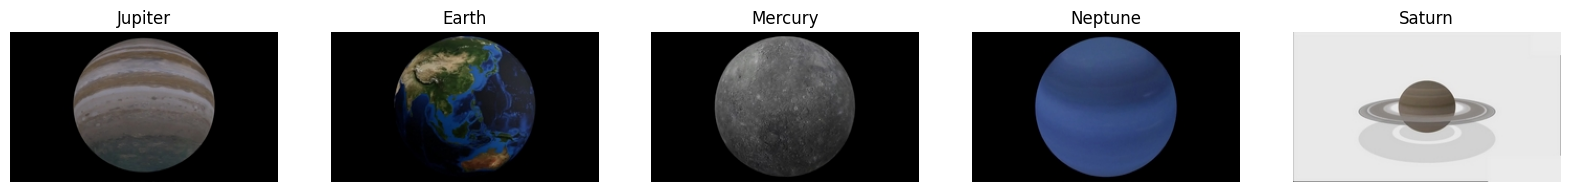

In [3]:

# Select 5 random classes
selected_classes = random.sample(planets, 5)

# Create a figure with 5 subplots
plt.figure(figsize=(20, 6))
for i, planet in enumerate(selected_classes):
    # Get a list of image files for the current planet
    planet_dir = os.path.join(data_dir, planet)
    files = os.listdir(planet_dir)
    
    # Select a random image from the current planet
    file = random.choice(files)
    image_path = os.path.join(planet_dir, file)
    
    # Load and display the image
    img = mpimg.imread(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(planet)

plt.show()



In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, SpatialDropout2D, Dropout
batch_size = 16
nb_classes =4
nb_epochs = 20
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 128)       0

2024-02-24 19:27:55.983583: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(128, (2,2), strides=(2,2), padding='same', activation='relu', use_bias=True, input_shape=(256, 256, 3)),
    BatchNormalization(),
    SpatialDropout2D(0.2),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Conv2D(256, (2,2), strides=(2,2), padding='same', activation='relu', use_bias=True),
    SpatialDropout2D(0.2),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Conv2D(512, (2,2), strides=(2,2), padding='same', activation='relu', use_bias=True),
    SpatialDropout2D(0.2),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, batch_size=batch_size, epochs=nb_epochs, verbose=1)

# Assuming you have a test generator named test_generator
evaluation = model.evaluate(test_generator)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


Epoch 1/20
23/23 [==============================] - 25s 1s/step - loss: 1.3028 - accuracy: 0.4923
Epoch 2/20
23/23 [==============================] - 24s 1s/step - loss: 0.4260 - accuracy: 0.8545
Epoch 3/20
23/23 [==============================] - 24s 1s/step - loss: 0.3378 - accuracy: 0.8741
Epoch 4/20
23/23 [==============================] - 24s 1s/step - loss: 0.2683 - accuracy: 0.9077
Epoch 5/20
23/23 [==============================] - 24s 1s/step - loss: 0.1928 - accuracy: 0.9357
Epoch 6/20
23/23 [==============================] - 24s 1s/step - loss: 0.1667 - accuracy: 0.9441
Epoch 7/20
23/23 [==============================] - 24s 1s/step - loss: 0.1541 - accuracy: 0.9510
Epoch 8/20
23/23 [==============================] - 24s 1s/step - loss: 0.0833 - accuracy: 0.9762
Epoch 9/20
23/23 [==============================] - 24s 1s/step - loss: 0.0499 - accuracy: 0.9804
Epoch 10/20
23/23 [==============================] - 24s 1s/step - loss: 0.0253 - accuracy: 0.9902
Epoch 11/20
23/23 [